C:\Users\User\AppData\Local\Temp\ipykernel_11844\2148568587.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\User\AppData\Local\Temp\ipykernel_11844\2148568587.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('Electric_Production.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)#, date_parser=parser)


DATE
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
Name: IPG2211A2N, dtype: float64


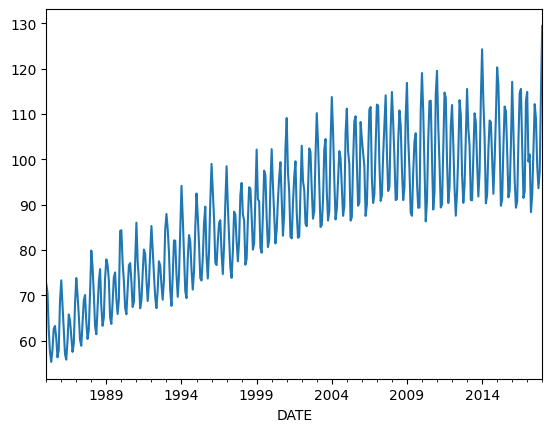

In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

series = read_csv('Electric_Production.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11844\4252313163.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\User\AppData\Local\Temp\ipykernel_11844\4252313163.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('Electric_Production.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)#, date_parser=parser)


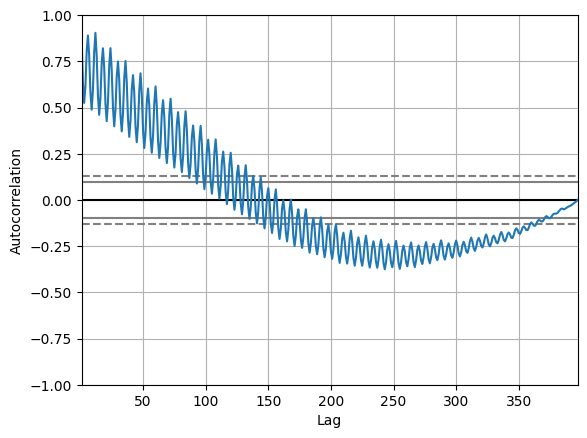

In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

series = read_csv('Electric_Production.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11844\1258972102.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\User\AppData\Local\Temp\ipykernel_11844\1258972102.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('Electric_Production.csv', header=0, index_col=0, parse_dates=True, squeeze=True)#, date_parser=parser)


                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  397
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1100.930
Date:                Sun, 09 Jul 2023   AIC                           2213.861
Time:                        14:54:03   BIC                           2237.749
Sample:                    01-31-1985   HQIC                          2223.325
                         - 01-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0650      0.044     -1.488      0.137      -0.151       0.021
ar.L2         -0.4828      0.049     -9.859      0.000      -0.579      -0.387
ar.L3         -0.5190      0.047    -11.102      0.0

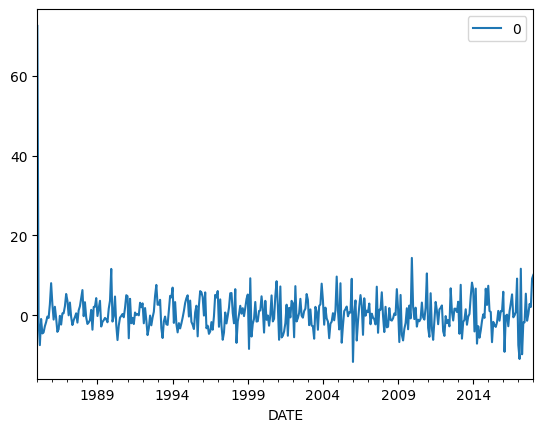

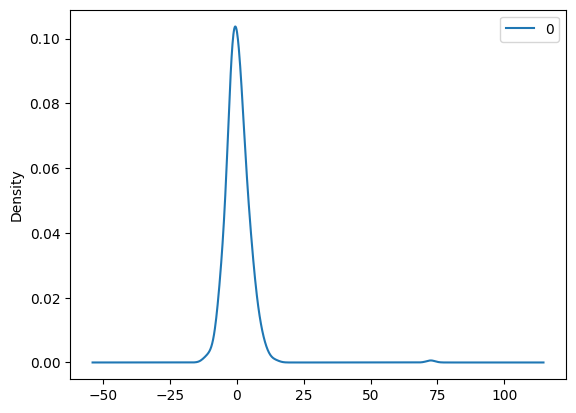

                0
count  397.000000
mean     0.451796
std      5.316962
min    -11.726845
25%     -2.138246
50%     -0.113048
75%      2.445340
max     72.505200


In [6]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
series = read_csv('Electric_Production.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

C:\Users\User\AppData\Local\Temp\ipykernel_11844\226536813.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\User\AppData\Local\Temp\ipykernel_11844\226536813.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('Electric_Production.csv', header=0, index_col=0, parse_dates=True, squeeze=True)#, date_parser=parser)


predicted=92.641015, expected=92.356600
predicted=101.717320, expected=103.066000
predicted=111.284089, expected=112.057600
predicted=108.783861, expected=111.839900
predicted=102.045514, expected=99.192500
predicted=90.555511, expected=90.817700
predicted=92.641696, expected=92.058700
predicted=101.702562, expected=100.967600
predicted=109.661051, expected=107.568600
predicted=106.737764, expected=114.103600
predicted=106.554101, expected=101.531600
predicted=91.802594, expected=93.006800
predicted=92.546358, expected=93.912600
predicted=100.756817, expected=106.752800
predicted=115.296599, expected=114.833100
predicted=112.484432, expected=108.235300
predicted=98.339574, expected=100.438600
predicted=94.218337, expected=90.994400
predicted=94.111559, expected=91.234800
predicted=101.826255, expected=103.958100
predicted=111.728498, expected=110.763100
predicted=109.023800, expected=107.566500
predicted=98.585236, expected=97.718300
predicted=90.640036, expected=90.997900
predicted=93

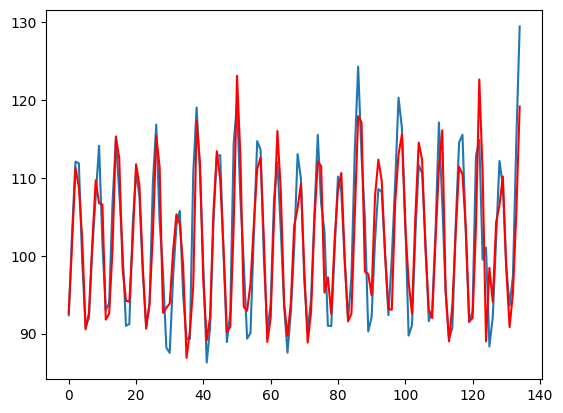

In [7]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('Electric_Production.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()